In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

# 1.Heat Equation

$$ 
\frac{\partial}{\partial t} u(\vec{r},t) = a \Delta u(\vec{r},t)
$$

### One Dimension

$$
\frac{\partial}{\partial t} u(x,t) = a \frac{\partial^2}{\partial x^2} u(x,t)
$$

Here, $ u(x,t) $ is an array $\{ u_0, u_2, \dots, u_{n-1} \} $ Which means that we have $n$ coupled differential equations. We can use the double centeral method to find the derivative:
$$
\frac{\partial^2}{\partial x^2} u_j = \frac{u_{j+1}-2u_{j}+u_{j-1}}{(\Delta x)^2}
$$
But as we already know, this method won't work for the edge points, so we can either use the double forward and double backward method to approximate them, or we can just ignore them and consider them to be to be part of the constant heat bath:
$$ u_0 = \mathrm{const.} \quad u_{n-1} = \mathrm{const.} $$

So the heat equation becomes:

$$\frac{\partial}{\partial t}u_j=\frac{a}{(\Delta x)^2}\left(u_{j-1}-2u_j+u_{j+1}\right)$$

In [3]:
def f(t,u0,a,dx):
    u=np.zeros(len(u0))
    u[1:-1]=(u0[:-2]-2*u0[1:-1]+u0[2:])*a/dx**2
    return u

* When one edge is equal to 0

In [4]:
t0=0
tFinal=5000
nMax=(tFinal-t0)*10 +1
time=np.linspace(t0,tFinal,nMax)
size=100
u0=np.zeros(size)
u0[0]=1
a=1
dx=1
oneDimension=integrate.solve_ivp(f,[t0,tFinal],u0,method='RK45',t_eval=time,args=(a,dx))

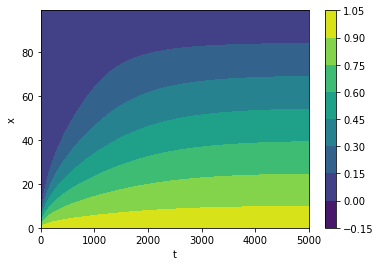

In [50]:
tArray,xArray=np.meshgrid(oneDimension.t,np.arange(size))
plt.contourf(tArray,xArray,oneDimension.y)
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()

#as you see one of the edges is constant at 1, while the other is constant at 0
#and in the middle the heat is distributed gradually.

Text(0, 0.5, 'at j= 50')

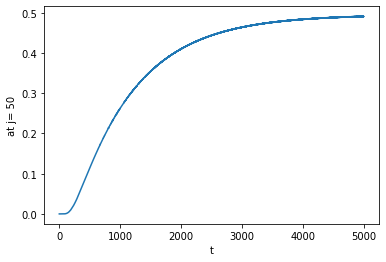

In [7]:
plt.plot(oneDimension.t,oneDimension.y[size//2])
plt.xlabel('t')
plt.ylabel(f'at j= {size//2}')
#if we were to cut at y=size//2 (the middle), we will see that the temp gradually increases till
#it reaches 0.5, which is half the 1, so it makes sense.

  * When the 2 edges aren't equal to 0

In [15]:
t0=0
tFinal=4000
nMax=(tFinal-t0)*10 +1
time=np.linspace(t0,tFinal,nMax)
u0=np.zeros(size)
u0[0]=1
u0[-1]=1
a=1
dx=1
oneDimension2=integrate.solve_ivp(f,[t0,tFinal],u0,method='RK45',t_eval=time,args=(a,dx))

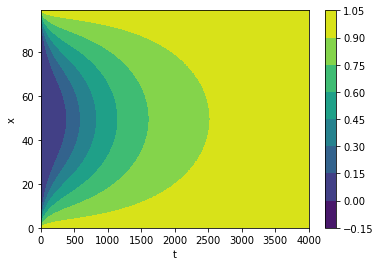

In [16]:
tArray,xArray=np.meshgrid(oneDimension2.t,np.arange(size))
plt.contourf(tArray,xArray,oneDimension2.y)
plt.xlabel('t')
plt.ylabel('x')
plt.colorbar()

Text(0, 0.5, 'at j= 50')

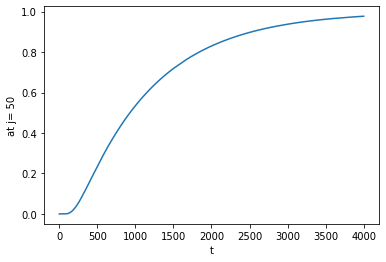

In [17]:
plt.plot(oneDimension2.t,oneDimension2.y[size//2])
plt.xlabel('t')
plt.ylabel(f'at j= {size//2}')

### Two Dimensions
$$
\frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{\partial^2}{\partial x^2} u(\vec{r},t) + \frac{\partial^2}{\partial y^2} u(\vec{r},t)\right)
$$

Here, $u(\vec{r},t) $ is an array $\{ u_{1,1}, u_{1,2}, \dots, u_{n,n} \}$ Which means that we have $(n \times n)$ coupled differential equations:

$$
\frac{\partial^2}{\partial x^2} u_{i,j} + \frac{\partial^2}{\partial y^2} u_{i,j} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}
$$
$$
\frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2} + \frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}\right)
$$

In [45]:
def f(t,u0,a,dx,dy,sizeX,sizeY):
    u0=u0.reshape(sizeX,sizeY)
    u=np.zeros([sizeX,sizeY])
    u[1:-1,1:-1]=(u0[:-2,1:-1]-2*u0[1:-1,1:-1]+u0[2:,1:-1])*a/dx**2 +(u0[1:-1,:-2]-2*u0[1:-1,1:-1]+u0[1:-1,2:])*a/dy**2 
    return u.flatten()

* When 2 of the edge corners are set to 0

In [107]:
t0=0
tFinal=5000
nMax=10000
time=np.linspace(t0,tFinal,nMax)
sizeX=100
sizeY=100
u0=np.zeros([sizeX,sizeY])
u0[0,:]=1
u0[:,0]=1

a=1
dx=1
dy=1
twoDimension=integrate.solve_ivp(f,[t0,tFinal],u0.flatten(),method='RK45',t_eval=time,args=(a,dx,dy,sizeX,sizeY))

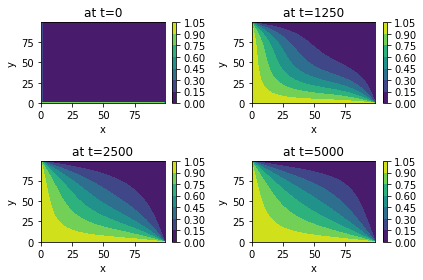

In [131]:
firstIteration=0
xArray,yArray=np.meshgrid(np.arange(sizeX),np.arange(sizeY))
fig, axs = plt.subplots(2, 2)
index=0 #it will be used to determine the time at which the heat distribution plot occurs.
for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        if(row==0 and firstIteration!=0):
            index=tFinal//4
        else:
            index=index*2
        pcm = ax.contourf(xArray,yArray,twoDimension.y[:,index].reshape(sizeX,sizeY))
        #showing the heat distribution at the beginning, after a quarter of the time, after half of the time,
        #and after full time
        ax.set_title(f"at t={index}")
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        fig.colorbar(pcm, ax=ax)
        firstIteration=1
plt.tight_layout()

* When all of the edge corners aren't 0

In [133]:
t0=0
tFinal=5000
nMax=10000
time=np.linspace(t0,tFinal,nMax)
sizeX=100
sizeY=100
u0=np.zeros([sizeX,sizeY])
u0[0,:]=1
u0[:,0]=1
u0[-1,:]=1
u0[:,-1]=1

a=1
dx=1
dy=1
twoDimension=integrate.solve_ivp(f,[t0,tFinal],u0.flatten(),method='RK45',t_eval=time,args=(a,dx,dy,sizeX,sizeY))

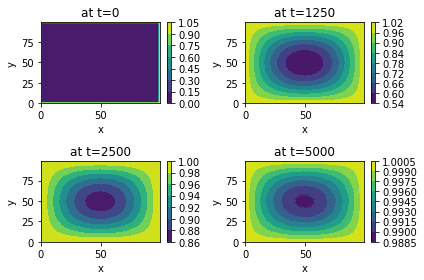

In [134]:
firstIteration=0
xArray,yArray=np.meshgrid(np.arange(sizeX),np.arange(sizeY))
fig, axs = plt.subplots(2, 2)
index=0 #it will be used to determine the time at which the heat distribution plot occurs.
for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        if(row==0 and firstIteration!=0):
            index=tFinal//4
        else:
            index=index*2
        pcm = ax.contourf(xArray,yArray,twoDimension.y[:,index].reshape(sizeX,sizeY))
        #showing the heat distribution at the beginning, after a quarter of the time, after half of the time,
        #and after full time
        ax.set_title(f"at t={index}")
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        fig.colorbar(pcm, ax=ax)
        firstIteration=1
plt.tight_layout()